In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('Add_sales_data_2018.csv')

In [52]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [53]:
df.shape

(205, 7)

In [54]:
df.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [56]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [71]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [57]:
# Define the dependent and independent variable

In [58]:
X=df['Add1(in Thousands)']
y=df['Profit(in Thousands)']

In [59]:
X.describe()

count    205.000000
mean     267.577561
std       26.219588
min      208.000000
25%      244.000000
50%      269.700000
75%      284.400000
max      327.700000
Name: Add1(in Thousands), dtype: float64

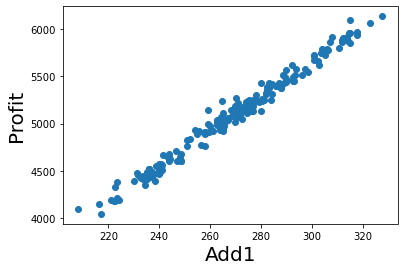

In [60]:
plt.scatter(X,y)
plt.xlabel('Add1',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()

In [61]:
from sklearn import linear_model

In [62]:
from sklearn.model_selection import train_test_split

x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y)

In [63]:
x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.values, x_test_set.values, y_training_set.values, y_test_set.values

x_training_set, x_test_set, y_training_set, y_test_set = x_training_set.reshape(-1, 1), x_test_set.reshape(-1, 1), y_training_set.reshape(-1, 1), y_test_set.reshape(-1, 1)

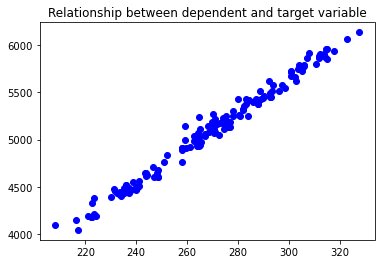

In [64]:
plt.title('Relationship between dependent and target variable')

plt.scatter(x_training_set, y_training_set,  color='blue')

plt.show()

In [65]:
lm = linear_model.LinearRegression()

lm.fit(x_training_set,y_training_set)

LinearRegression()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

model_score = lm.score(x_training_set,y_training_set)

In [67]:
print('R sq: ',model_score)


R sq:  0.9851164487366888


In [68]:
y_predicted = lm.predict(x_test_set)


In [69]:
# The coefficients

print('Coefficients: ', lm.coef_)

# The mean squared error

print("Mean squared error: %.2f"

% mean_squared_error(y_test_set, y_predicted))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(y_test_set, y_predicted))


Coefficients:  [[18.35699809]]
Mean squared error: 3676.07
Variance score: 0.98


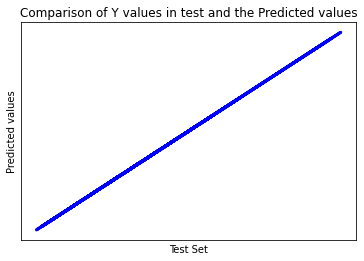

In [70]:
# So let's run the model against the test data

y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')

plt.xlabel('Test Set')

plt.ylabel('Predicted values')

plt.plot(x_test_set, y_predicted, color='blue', linewidth=3)

plt.xticks(())

plt.yticks(())

plt.show()